In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#2a. предметная область, источник данных, характер данных (реальные или имитационные)
#
#Рассматриваем статистику продаж некоторого продукта.
#Каждая строка в наборе данных представляет собой объем продаж за неделю,
#наряду с подробностями о маркетинговых кампаниях и рекламных методах, 
#используемых для продукта в течение двухлетнего периода.
#
#Источник: https://www.kaggle.com/datasets/ai0909/sales-data-for-company-product/data
#
#Характер данных не понятен. В источнике написано, что данные используются только для учебной деятельности.
#Будем рассматривать эти данные как имитационные.
#
#
#2b. какие атрибуты представлены в датасете, их тип (числовой, строковый (категории)), что они обозначают 
#
#Sale: Эта переменная содержит числовые данные, представляющие число продаж каждого продукта.
#Price: Наблюдаемая цена базовой недели для продукта.
#Radio: Kоличество радиорекламы или кампаний, пропагандирующих продукт для наблюдаемых недель.
#InStrSpending: Средние расходы, связанные с рекламой продукта в магазинах в течение указанной недели.
#Discount: Дисконтная ставка, действующая в течение указанной недели.
#TVSpending: Средние расходы на телевизионные кампании в течение указанной недели.
#StockRate: Коэффициент выбытия, рассчитанный как количество раз продукт был без запаса разделить на общее число посещений продуктов.
#OnlineAdsSpending: Расходы на интернет-рекламу, рассчитанная общая сумма расходов на онлайн рекламу.
#
#Все даннные числовые

In [8]:
df = pd.read_csv('market_data.csv')
df.columns
len(df.columns)

8

In [10]:
#3a. Определяем значения статистических показателей
lst = ['Объем выборки', 'Минимальное значение', 'Максимальное значение', 'Первый квартиль', 'Медиану', 'Третий квартиль', 'Межквартильный размах', 'Стандартное отклонение', 'Стандартную ошибку среднего', 'Коэффициент вариации, %','Среднее']
lst1 = []
data = {}
for i in range(len(df.columns)):
    lst1.append(df.columns[i])
    if lst1[i] not in data:
        data[lst1[i]] = [0]*11

for word in data:
    data[word][0] = 992
    data[word][1] = df[word].min()
    data[word][2] = df[word].max()
    data[word][3] = df[word].quantile (.25)
    data[word][4] = df[word].median()
    data[word][5] = df[word].quantile (.75)
    data[word][6] = df[word].quantile (.75) - df[word].quantile (.25)
    data[word][7] = df[word].std()
    data[word][8] = df[word].std() / (992 ** 0.5)
    data[word][9] = df[word].std() / df[word].mean()
    data[word][10] = df[word].mean()
    


DATA = pd.DataFrame(data, index = lst )
DATA

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
Объем выборки,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
Минимальное значение,1992.000000,0.190000,0.000000,0.130000,0.000000,0.140000,4.000000,12.540000
Максимальное значение,393914.000000,59.960000,0.500000,199.910000,1.000000,29.990000,2997.000000,3198.270000
Первый квартиль,112479.250000,14.830000,0.130000,49.637500,0.250000,6.917500,708.250000,786.327500
Медиану,170390.500000,31.385000,0.250000,97.510000,0.490000,14.820000,1413.500000,1595.455000
Третий квартиль,226027.250000,45.660000,0.380000,147.620000,0.740000,22.100000,2273.000000,2420.687500
Межквартильный размах,113548.000000,30.830000,0.250000,97.982500,0.490000,15.182500,1564.750000,1634.360000
Стандартное отклонение,81397.843301,17.493103,0.145348,57.117347,0.286810,8.715533,885.419636,927.474787
Стандартную ошибку среднего,2584.384109,0.555407,0.004615,1.813478,0.009106,0.276718,28.112102,29.447354
"Коэффициент вариации, %",0.475102,0.571800,0.578754,0.578821,0.579970,0.596961,0.598431,0.580941


In [ ]:
#3b. построить гистограмму распределения значений, определить есть ли выбросы 
#
#Определение выбросов будет смотреться по блочной диаграмме

Text(0.5, 1.0, 'Sale distribution')

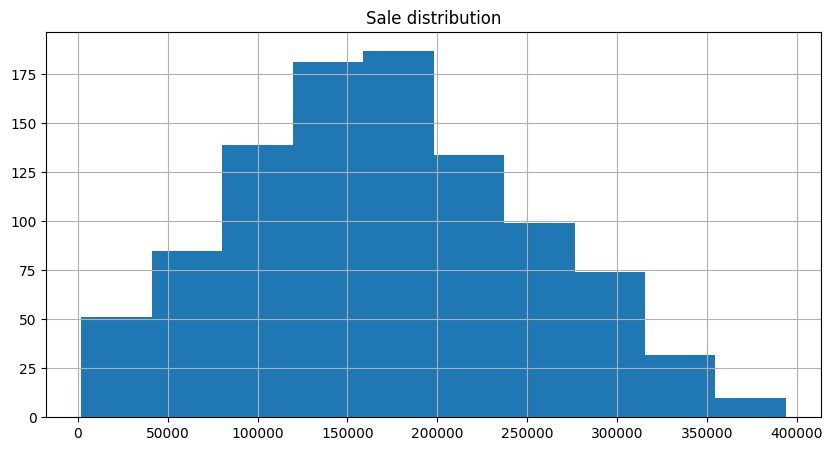

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.hist(df['Sale'],bins=10)
plt.grid(True)
plt.title('Sale distribution')

<Axes: >

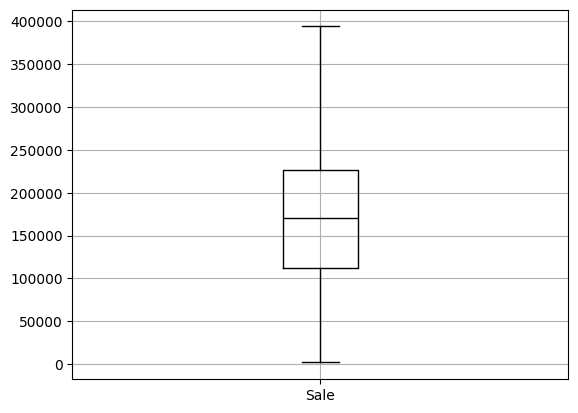

In [79]:
#По блочной диаграмме видно, что выбросов нет
df.boxplot(column=['Sale'], grid= True , color='black')

In [ ]:
#3c Пропущенные значения отсутствуют
#3d Считать пропущенные значения - как недостоверные и убирать из выборки

In [35]:
#4.Определить корреляцию между параметрами

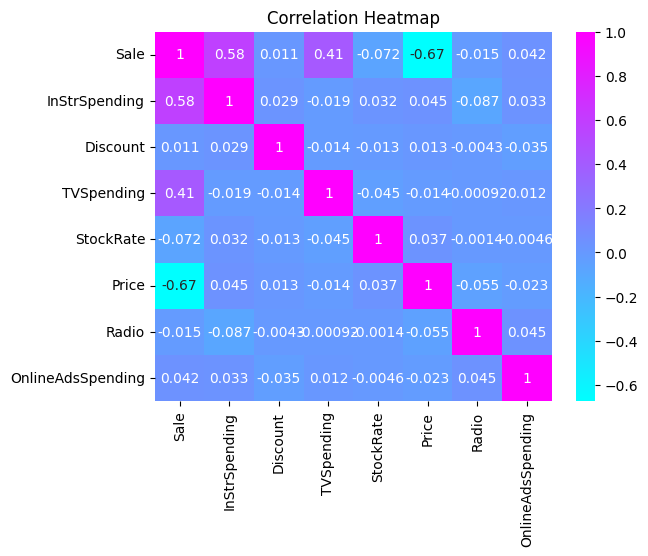

In [81]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

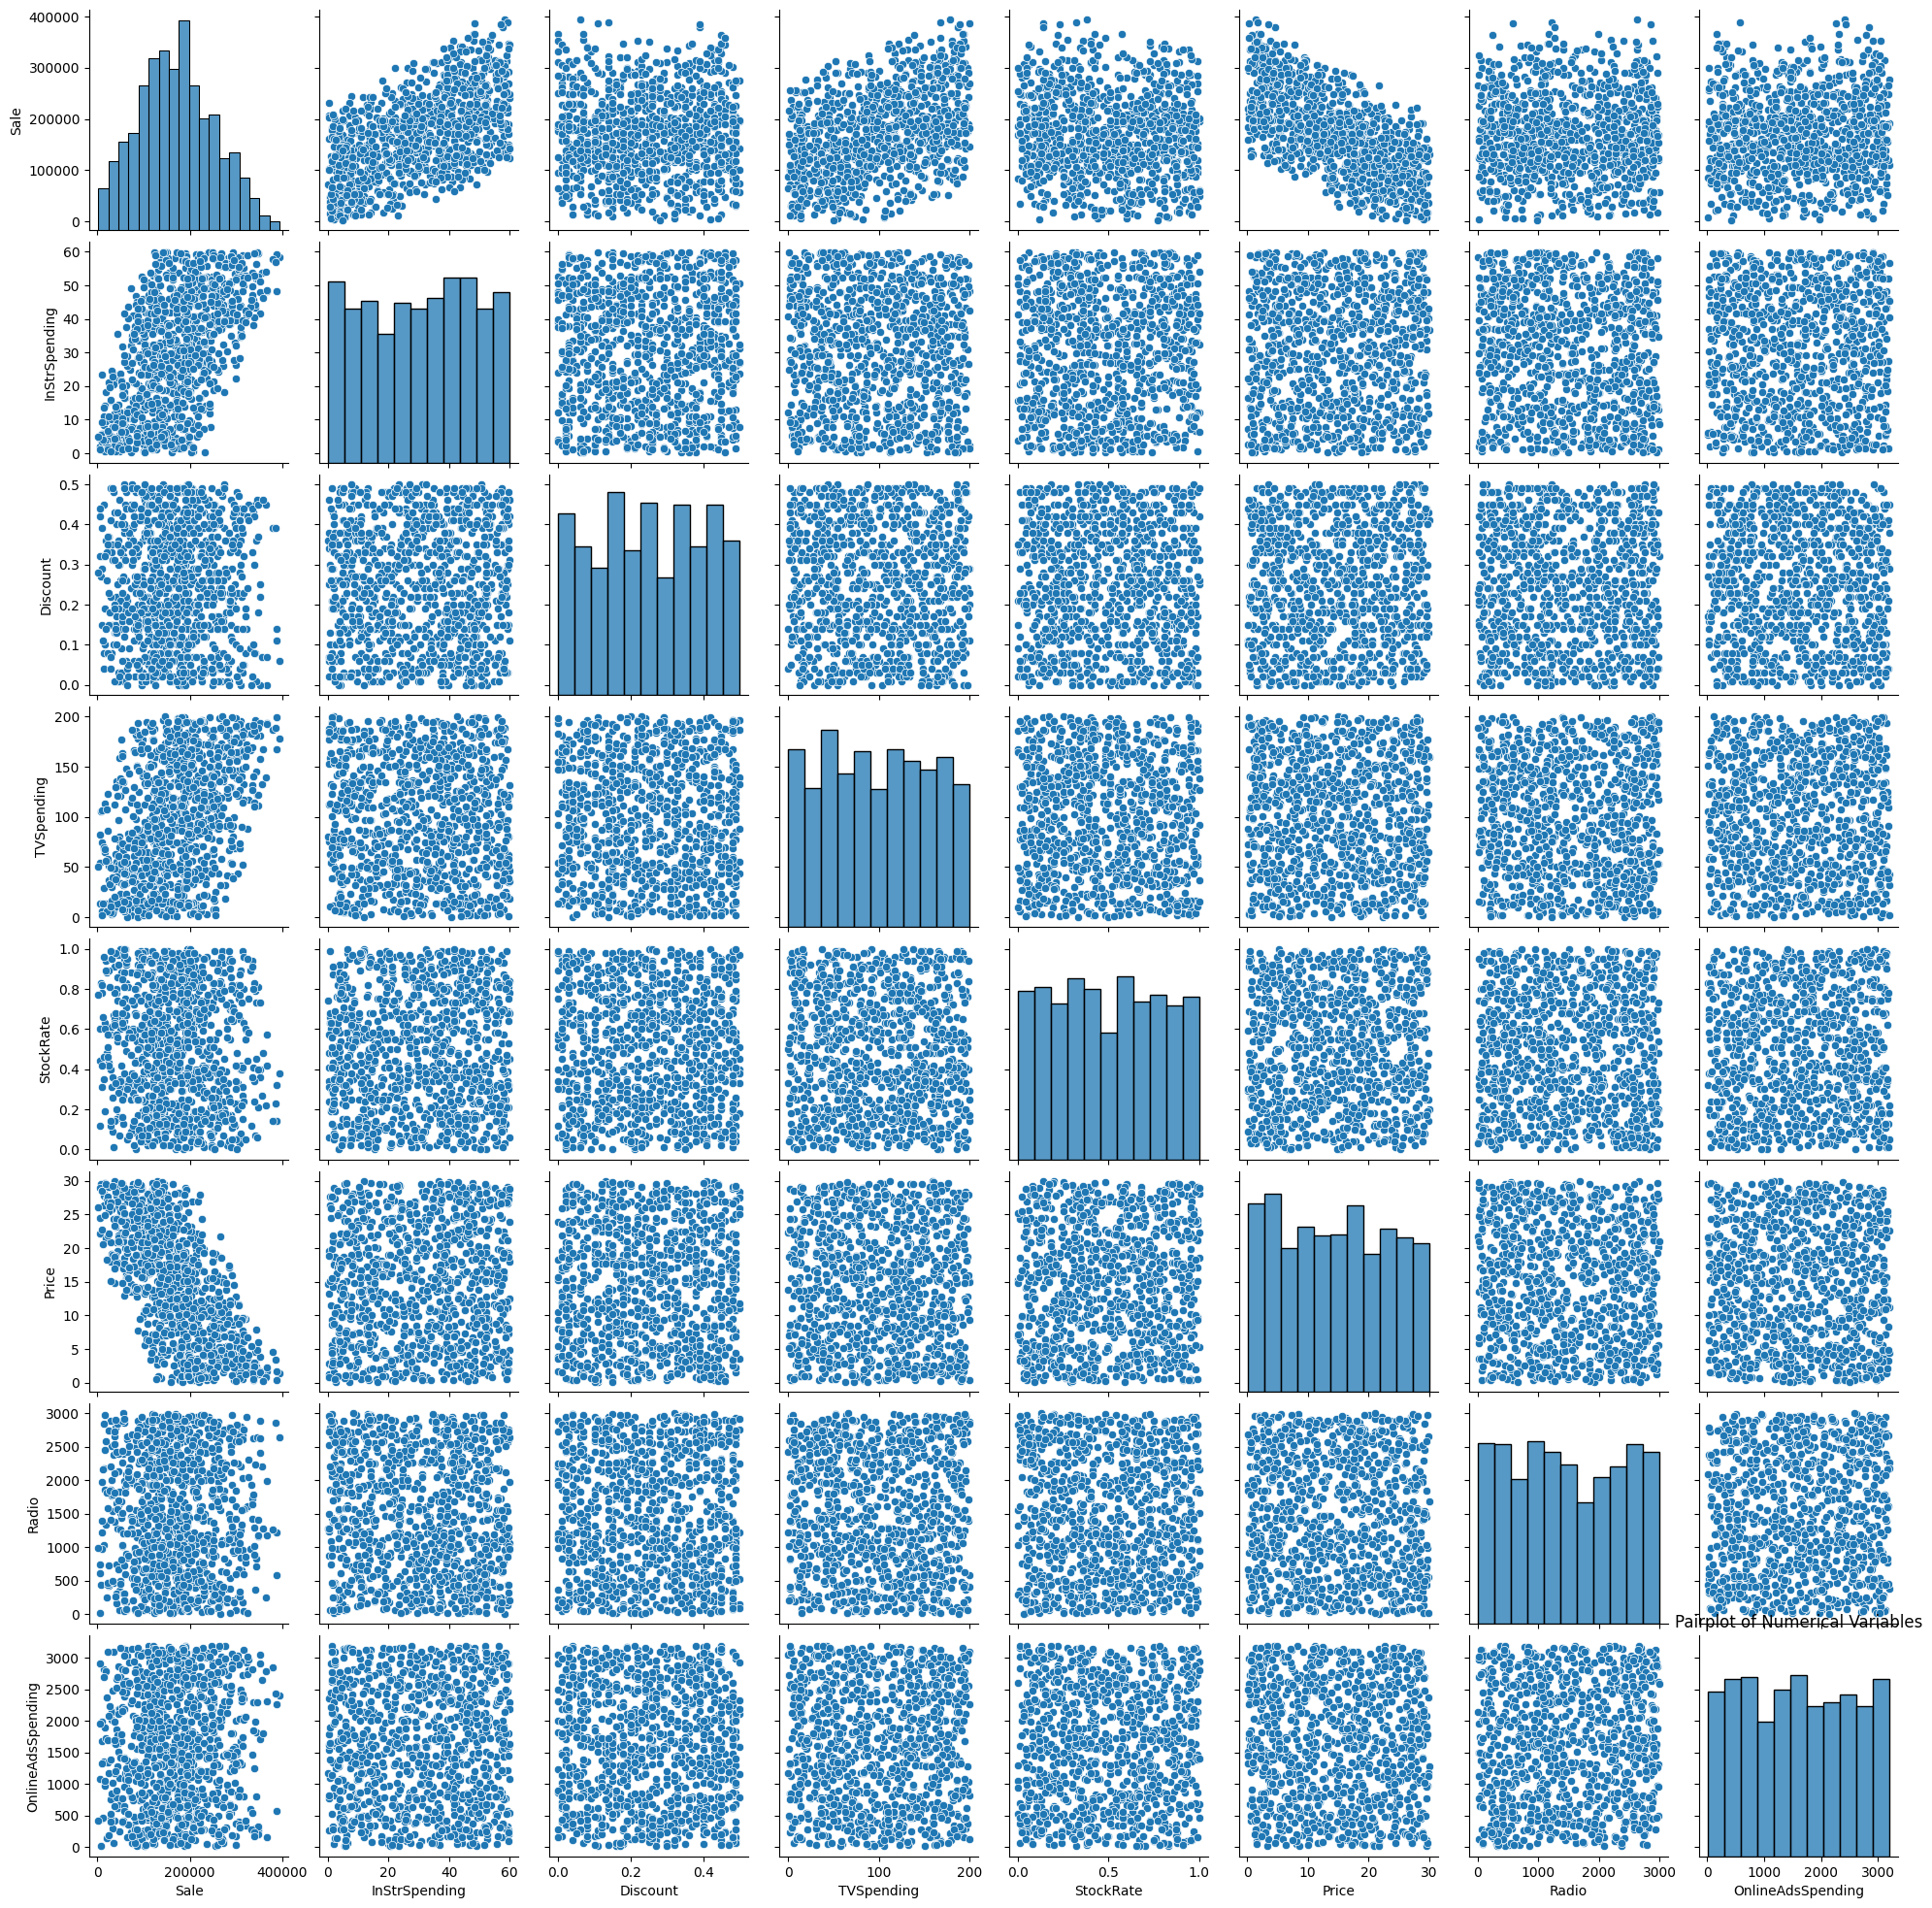

In [37]:
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

In [38]:
#4a. какие атрибуты высококоррелированы, определить характер корреляции  

#до 0,2: Очень слабая корреляция
#до 0,5: Слабая корреляция
#до 0,7: Средняя корреляция
#до 0,9: Высокая корреляция
#свыше 0,9: Очень высокая корреляция
#Исходя из этой градации(коэффы кореляции необходимо брать по модулю), высококоррелированные атрибуты это те, которые точб-в-точь совпадают,
#то есть значения одного равны или примерно равны значению другого.
#В данной выборке нет высококоррелированных атрибутов(только примеры зависимости одного и того же атрибута от себя самого).

#4b. какие атрибуты не имеют корреляцию
# Корреляция отсутствует у тех атрибутов, у которых коэфф. корр. равен или примерно равен нулю 0.